In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sb
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv("D:\\PROGRAMMING\\Datasets\\creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
## Checking for imbalance data
zeros = len(df[df['Class']==0])
ones = len(df[df['Class']==1])
print("Percentage of 0s : ", ((zeros / (zeros + ones))*100).__round__(3))
print("Percentage of 1s : ", ((ones / (zeros + ones))*100).__round__(3))

## Here:
## Our Data is highly imbalanced

Percentage of 0s :  99.827
Percentage of 1s :  0.173


<Axes: xlabel='Class', ylabel='count'>

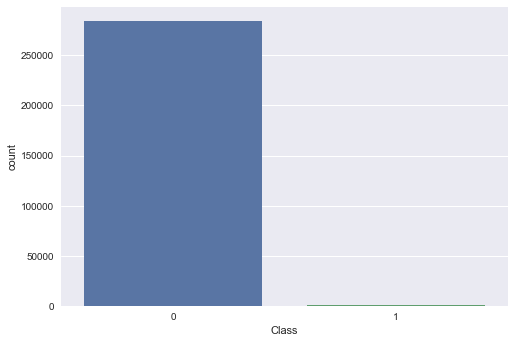

In [4]:
sb.countplot(x = 'Class', data=df)

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

<h3>SMOTE(Synthetic Minority Over-Sampling Technique)</h3>

In [6]:
X = df.iloc[:, df.columns!='Class']
y = df[['Class']]
os = SMOTE(random_state=0)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
cols = X_train.columns

In [8]:
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=cols)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Class'])

In [9]:
print("Length of newly sampled data :", len(os_data_X))
print("The number of 0's are     : ", len(os_data_y[os_data_y['Class']==0]))
print("The number of 1's are     : ", len(os_data_y[os_data_y['Class']==1]))
print("The Percentage of 0's are : ", len(os_data_y[os_data_y['Class']==0]) / len(os_data_y))
print("The Percentage of 1's are : ", len(os_data_y[os_data_y['Class']==1]) / len(os_data_y))

Length of newly sampled data : 396528
The number of 0's are     :  198264
The number of 1's are     :  198264
The Percentage of 0's are :  0.5
The Percentage of 1's are :  0.5


In [10]:
## Here:
## Our data is balanced

<h3>RFE (Recursive Feature Eliminations) </h3>

In [11]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False  True False  True  True  True  True
  True  True  True False  True  True False False False  True  True False
 False False False  True  True False]
[16  3  4  6  1  7  1  8  1  1  1  1  1  1  1 14  1  1  2  5  9  1  1 13
 10 11 12  1  1 15]


In [12]:
selected_features = list(os_data_X.columns[rfe.support_])
X = os_data_X[selected_features]
y = os_data_y['Class']
selected_features

['V4',
 'V6',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V16',
 'V17',
 'V21',
 'V22',
 'V27',
 'V28']

<h3> Logit </h3>

In [13]:
est = sm.Logit(y, X).fit()
print(est.summary2())

Optimization terminated successfully.
         Current function value: 0.369501
         Iterations 11
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.467      
Dependent Variable: Class            AIC:              293064.9794
Date:               2023-07-21 22:46 BIC:              293228.3369
No. Observations:   396528           Log-Likelihood:   -1.4652e+05
Df Model:           14               LL-Null:          -2.7485e+05
Df Residuals:       396513           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     11.0000                                       
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
V4         0.1716     0.0030    56.4863   0.0000    0.1656    0.1775
V6        -0.0453     0.0034   -13.1655   0.

In [14]:
X = X.drop(['V22'], axis = 1)

<h3> Variable Inflation Factor (VIF) </h3>

In [15]:
def find_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, k) for k in range(x.shape[1])]
    return vif

In [16]:
x = X.copy()
find_vif(x)

,variables,VIF
0,V4,7.985451
1,V6,2.585731
2,V8,2.759639
3,V9,6.409602
4,V10,15.329736
5,V11,11.987653
6,V12,23.896992
7,V13,1.113163
8,V14,13.921400
9,V16,22.002280


In [17]:
X = X.drop(['V12', 'V16', 'V17', 'V14'], axis = 1)

In [18]:
x = X.copy()
find_vif(x)

,variables,VIF
0,V4,6.502437
1,V6,2.437966
2,V8,2.459543
3,V9,5.922472
4,V10,9.398572
5,V11,7.912884
6,V13,1.066221
7,V21,2.213027
8,V27,1.456152
9,V28,1.107192


<h3> Standard Scaller </h3>

In [19]:
scale = StandardScaler()
X_Scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_Scaled, columns = X.columns)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_predict = logreg.predict(X_test)

final = pd.DataFrame(np.c_[y_test, y_predict], columns = ["Actual", "Predicted"])

<h3>Checking For Overfitting </h3>

In [22]:
print("Accuracy Score for train is : ", end="")
print((logreg.score(X_train, y_train)).__round__(4)*100)
print("Accuracy Score for test is : ", end="")
print((logreg.score(X_test, y_test)).__round__(4)*100)

Accuracy Score for train is : 96.23
Accuracy Score for test is : 96.21


<h3> Confusin Matrix </h3>

In [23]:
matrix = metrics.confusion_matrix(y_test, y_predict)
print(matrix)

[[58850  1039]
 [ 3466 55604]]


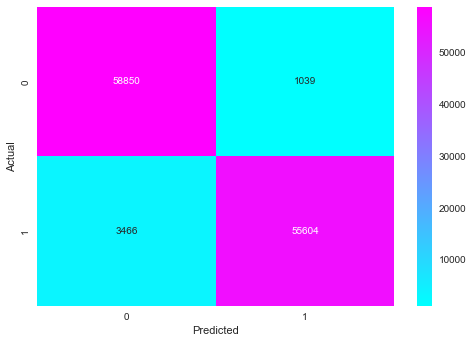

In [24]:
sb.heatmap(matrix, annot=True, fmt='g', cmap='cool')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<h3> Classification Report </h3>

In [25]:
print("Classification Report is : ")
print(metrics.classification_report(y_test, y_predict))

Classification Report is : 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     59889
           1       0.98      0.94      0.96     59070

    accuracy                           0.96    118959
   macro avg       0.96      0.96      0.96    118959
weighted avg       0.96      0.96      0.96    118959



<h3> AUC-ROC Curve </h3>

In [ ]:
plt.style.use('seaborn')
y_predict_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)
auc = metrics.roc_auc_score(y_test, y_predict)

plt.plot(fpr, tpr, label = "ROC-Curve (AUC = %0.2f)"%auc)
plt.plot([0, 1], [0, 1], 'r--', label = "Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc = "lower right")
plt.show()